# Импорт библиотек

In [1]:
import pandas as pd
from datetime import timedelta
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from typing import List

# Загрузка данных из файла

In [2]:
df = pd.read_csv("aapl.us.txt", parse_dates=["Date"])

# Анализ данных, разделение на обучающую и тестовую выборки

In [3]:
df.shape

(8364, 7)

In [4]:
df.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0


In [5]:
df["Date"].min(), df["Date"].max()

(Timestamp('1984-09-07 00:00:00'), Timestamp('2017-11-10 00:00:00'))

<AxesSubplot:xlabel='Date'>

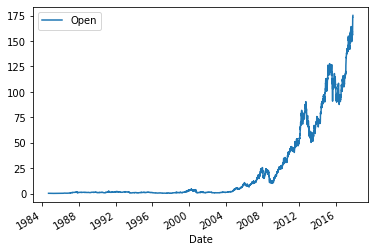

In [6]:
df.plot(x = 'Date', y = 'Open')

<AxesSubplot:xlabel='Date'>

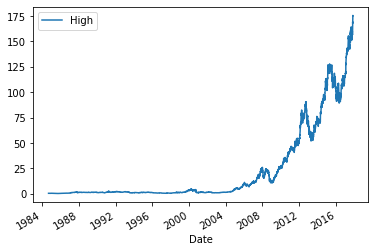

In [7]:
df.plot(x = 'Date', y = 'High')

In [8]:
df[['Open', 'Close', 'Low', 'High']].corr()

,Open,Close,Low,High
Open,1.000000,0.999902,0.999942,0.999956
Close,0.999902,1.000000,0.999955,0.999953
Low,0.999942,0.999955,1.000000,0.999928
High,0.999956,0.999953,0.999928,1.000000


In [10]:
df_6_year = df[df['Date'] > df['Date'].max() - timedelta(days=365*6)]

In [11]:
df_6_year.shape

(1509, 7)

In [12]:
df_6_year['Date'].min(), df_6_year['Date'].max()

(Timestamp('2011-11-14 00:00:00'), Timestamp('2017-11-10 00:00:00'))

In [14]:
train_size = int(df_6_year.shape[0] * 0.8)
train_df = df_6_year.iloc[:train_size]
val_df = df_6_year.iloc[train_size:]

In [15]:
train_df.shape

(1207, 7)

In [16]:
val_df.shape

(302, 7)

In [18]:
train_df['Date'].min(), train_df['Date'].max(), val_df['Date'].min(), val_df['Date'].max()

(Timestamp('2011-11-14 00:00:00'),
 Timestamp('2016-08-31 00:00:00'),
 Timestamp('2016-09-01 00:00:00'),
 Timestamp('2017-11-10 00:00:00'))